In [21]:
'''
URJC / GIA / Aprendizaje Automático 1 / Curso 23-24
alfredo.cuesta@urjc.es
'''
import pandas as pd
import numpy as np
from sklearn.preprocessing import add_dummy_feature
from sklearn import linear_model
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=(4,4)
np.set_printoptions(precision=2)
pd.set_option("display.precision", 4)

# Introducción

Vamos a comenzar la parte del curso dedicada a **Aprendizaje supervisado.**

Existen dos grandes problemas de aprendizaje supervisado:
- Regresión,
- Clasificación;

aunque realmente son el mismo: una regresión es lo mismo que una clasificación con infinitas clases.


## Regresión

Consiste en aprender a emparejar los ejemplos dados con un  **valor objetivo** o _target_ que toma valores en un intervalo continuo.

><u>Ejemplos</u>
- Estimar el precio de una casa en función de una serie de características sobre el terreno, los servicios en la zona, el nivel adquisitivo de los vecinos, etc.
- Estimar la probabilidad de que un paciente desarrolle una enfermedad a partir de su historial.
- Estimar el precio que alcanzará una acción en el mercado continuo a partir de los indicadores bursátiles
- Estimar las ventas de un producto en función de factores como el precio, la promoción, la época del año, etc.
- Estimar la calidad de energía que consumirá un edificio en función de su tamaño, el número de habitaciones, las personas que haya dentro, etc.

## Clasificación

Consiste en aprender a emparejar los ejemplos dados con un número discreto, denominado **etiqueta, clase** o _label_.

A veces la clase toma valores dentro de un conjunto de categorías, por ejemplo {_rojo_, _verde_, _azul_}. En ese caso o bien se hace una codificación con entero, o una codificación _one-hot_.

Cuando sólo hay dos clases se dice que el problema es **binario** o de clasificación binaria.

Si hay varias clases se trata de un problema **multi-clase**.

><u>Ejemplos</u>
- Estimar la enfermedad dado un conjunto de síntomas.
- Estimar si un correo electrónico entrante es o no _spam_
- Estimar el tipo de suelo en imágenes por satélite.
- Estimar si un texto tiene contenido xenófobo.




## En ambos casos

En problemas supervisados **siempre** tendremos:
- Un conjunto de datos que consiste en:
 - $N$ ejemplos $D$ dimensionales
 - tal que cada ejemplo está emparejado con su valor objetivo
- y un modelo para aprender a emparejar cada ejemplo con su valor objetivo (para regresión) su etiqueta (para clasificación).

Y en ambos casos también nuestro objetivo es **ESTIMAR** con la mayor tasa de acierto posible el valor objetivo o la etiqueta de los ejemplos **nuevos** que lleguen a partir del momento en el que pongamos nuestro sistema a funcionar.

**¡¡ IMPORTANTE !!**

En el último párrafo se habla de **sistema** y NO de modelo. <br>
El modelo es solo una parte de un sistema (o máquina) más grande que también aprenderemos a construir.


# Modelo general para aprendizaje supervisado

Llamaremos modelo a la función paramétrica
$~f({\bf x};{\bf w})$ que:
- recibe un ejemplo ${\bf x}\in \mathbb R^D$
- produce una salida, que puede ser un vector  $~\bf y~$ o un escalar $~y~$, dependiendo del problema;
- y el vector $\bf w$ es el conjunto de parámetros que nosotros podemos modificar para transformar la entrada $\bf x$ en la salida $\bf y$.

Si en vez de un único ejemplo de entrada recibe un conjunto de ejemplos (a veces también se le denomina "lote" o _batch_ ) ${\bf X}\in \mathbb R^{D\times N}$ entonces el modelo produce un conjunto o lote de salidas $\bf Y$.

# Modelo lineal

Es aquel en el que la salida del modelo es una combinación lineal de la entrada y los parámetros.
Es decir
$$
f({\bf x};{\bf w}) = w_0 + w_1x_1 + \cdots + w_Dx_D.
$$

La relación entre un modelo lineal y un hiperplano es evidente.<br>
Dado un modelo lineal, existe un hiperplano cuyo vector característico es ${\bf w} = (w_1,\ldots,w_D)^\top$ y término independiente es $w_0$ tal que $~w_0 + {\bf w}^\top{\bf x} = 0.$






## Modelo lineal de regresión

$$\hat y = w_0 + {\bf w}^\top{\bf x},$$
donde $\hat y$ es la estimación que hace el modelo para el ejemplo $\bf x$ dado con los parámetros escogidos.

El modelo lineal de regresión es lo que obtenemos al **ajustar por mínimos cuadrados** un conjunto de pares de puntos, pero generalizado a $D\ge 2$ dimensiones.

### Aprendizaje

Como sabemos, "aprender" significa encontrar los parámetros óptimos (o al menos los mejores posibles); que son aquellos con los que logramos la menor discrepancia entre la estimación del valor objetivo y el valor objetivo verdadero.

Un **primer modo** de lograrlo es con un simple cálculo matricial.

En primer lugar creamos una variable _dummy_ para el conjunto de datos, de manera que tenemos

$$
{\bf X} =
  \left[
    \begin{matrix}
    1 & x_1^{(1)} & x_2^{(1)} &  \ldots & x_D^{(1)} \\
    1 & x_1^{(2)} & x_2^{(2)} &  \ldots & x_D^{(2)} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    1 & x_1^{(N)} & x_2^{(N)} &  \ldots & x_D^{(N)} \\
    \end{matrix}
  \right]
\quad
{,}
\quad
{\bf Y} =
  \left[
    \begin{matrix}
    y_1 \\ y_2 \\ \vdots \\ y_N
    \end{matrix}
  \right]
{,}
\quad
{\bf w} =
  \left[
    \begin{matrix}
    w_0 \\ w_1 \\ w_2 \\ \vdots \\ w_D
    \end{matrix}
  \right]
$$

El modelo lineal para el conjunto de entrenamiento $\{{\bf X}, {\bf Y}\}$ queda entonces:

$$
\begin{align}
{\bf Y} &= {\bf X}{\bf w}~, \\
{\bf X}^\top{\bf Y} &= {\bf X}^\top{\bf X}{\bf w}~,\\
\big({\bf X}^\top{\bf X}\big)^{-1}{\bf X}^\top{\bf Y} &= \big({\bf X}^\top{\bf X}\big)^{-1}{\bf X}^\top{\bf X}{\bf w}~,\\
\big({\bf X}^\top{\bf X}\big)^{-1}{\bf X}^\top{\bf Y} &= \mathbb{I}{\bf w}~,\\
\end{align}
$$
donde $\mathbb{I}$ es la matriz identidad. Por tanto el vector óptimo de parámetros es
<br>

$$
{\bf w}^* = \big({\bf X}^\top{\bf X}\big)^{-1}{\bf X}^\top{\bf Y}
$$

**Desventajas**

Este método es costoso computacionalmente cuando $\bf X$ es muy grande ya que exige invertir la matriz $~{\bf X}^\top{\bf X}~ \in\mathbb R ^{D\times D}$.

Existen métodos computacionales para hacerlo más eficiente, pero la solución más adoptada hoy en día es utilizar el **descenso del gradiente**, que explicaremos más adelante.

### Ejemplo
En este ejemplo vamos a utilizar un conjunto de datos extremadamente simple.
- $\bf X$ consiste en $N$ ejemplos con $D=1$
- $\bf Y$ son sus respectivos valores objetivo.
Queremos encontrar un modelo lineal de regresión de dos maneras:
1. Utilizando el método `sklearn.linear_model.LinearRegression`
2. Calculado el vector de pesos óptimo ${\bf w}^*$ con la fórmula que hemos deducido.

Comenzamos fijando el número de ejemplos del conjunto de entrenamiento $(N)$ y la semilla del generador de números aleatorios.

Además creamos una función que devuelve los pares (x,y) de entrenamiento (aleatorios pero dependientes de la semilla).

In [22]:
N = 20
seed = 1460
np.random.seed(seed=seed)

def generate_XY(N):
  m = np.random.rand()
  b = np.random.randint(5)
  X = np.linspace(0,10,N) + np.random.random(N)
  Y = m*X + b
  Y = Y + np.random.random(N)*2
  X = X.reshape(-1,1) #<- necesario para tener vectores columna
  Y = Y.reshape(-1,1) #<- necesario para tener vectores columna
  return X,Y


X, Y = generate_XY(N)

**1.** Utilizando `sklearn.linear_model.LinearRegression`

> Se crea un objeto de la clase `LinearRegression` y después se utiliza:
- `fit` para encontrar los parámetros
- `predict` para hacer predicciones

><small>
En este caso las predicciones las haremos sobre el mismo conjunto $\bf X$, pero lo habitual es que sea sobre el conjunto de Test (obviamente distinto del conjunto de entrenamiento).
</small>

In [23]:
reg = linear_model.LinearRegression()
reg.fit(X,Y)
y_hat1 = reg.predict(X)

**2.** Utilizando la fórmula deducida
> En primer lugar se crea una función que calcula ${\bf w}^*$.<br>
A continuación se crea el modelo lineal $f({\bf x};{\bf w}^*) = w_0^* + w_1^*x_1$ y obtenemos la predicción $\hat y$ para cada ejemplo.<br>
Es importante darse cuenta de que la primera línea de la función `matrix_solution` añade una característica _dummy_ al conjunto de datos $\bf X$, que es un requisito para poder aplicar la fórmula en caso de que $\bf X$ no la lleve incorporada.

In [24]:
def matrix_solution(X, Y):
  X = add_dummy_feature(X)
  XtX = np.matmul(X.T, X)
  invXtX = np.linalg.inv(XtX)
  w_star = np.matmul(invXtX, X.T)
  w_star = np.matmul(w_star, Y)
  return w_star

w_star = matrix_solution(X,Y)
y_hat2 = w_star[0] + np.matmul(X,w_star[1])


Finalmente pintamos:
- los pares $(x^{(i)}, y^{(i)})$, con $i=1,2,\ldots,N$, con aspas negras
- los pares $(x^{(i)}, \hat y^{(i)})$ obtenidos con `LinearRegression` en forma de línea roja que une los puntos.<br> Obviamente esta línea es una recta.
- los pares $(x^{(i)}, \hat y^{(i)})$ obtenidos con la fórmula, con puntos amarillos, un poco más grandes que los puntos negros.

Como era de esperar, los puntos azules caen sobre la línea roja.

Además imprimios por pantalla los parámetros que hemos encontrado para este modelo y estos datos.
- Por un lado utilizamos los atributos `intercept_` y `coef_` del objeto `reg`
- Por otro lado mostramos el vector `w_star`.


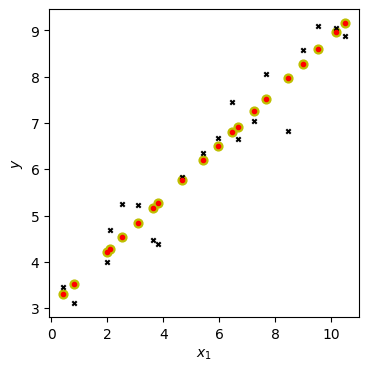


Utilizando LinearRegression()
                           w_star
intercept     [3.052803294532102]
coef       [[0.5815517485702234]]

Utilizando la fórmula
   w_star
0  3.0528
1  0.5816


In [25]:
plt.plot(X, y_hat1,'r.')
plt.scatter(X, y_hat2,c='y',s=40)
plt.scatter(X,Y,c='k',s=10, marker = 'x')
plt.xlabel('$x_1$'); plt.ylabel('$y$')
plt.show()

print('\nUtilizando LinearRegression()')
print(pd.DataFrame({'w_star': [reg.intercept_, reg.coef_]}, index=['intercept', 'coef']))
print('\nUtilizando la fórmula')
print(pd.DataFrame(w_star, columns=['w_star']))

## Modelo lineal de clasificación binaria
$$\hat y = \mathrm{Signo}\big(w_0 + {\bf w}^\top{\bf x}\big).$$

Este modelo asume que tenemos dos clases etiquetadas como $\{+,-\}.$

De nuevo $\hat y$ representa la estimación que hace el modelo.
Pero cuando se trata de clasificación binaria aparecen dos términos importantes nuevos:
- superficie de decisión,
- función discriminante.

### Superficie de decisión

Los puntos de $\mathbb R ^D$ que satisfacen la igualdad  $~w_0 + {\bf w}^\top{\bf x}=0~$  están exactamente sobre el hiperplano; no tienen signo positivo ni negativo. Por tanto se situan exactamente sobre la frontera entre las dos clases, y se denomina **superficie de decisión**.

La superficie de decisión será un hiperplano sólo si $f({\bf x};{\bf w})$ es lineal.

### Función discriminante

En el modelo lineal  de clasificación binaria utilizamos la función $\mathrm{Signo}$ para producir la estimación de la etiqueta; es decir para **discriminar** a qué clase pertenece el ejemplo dado.

PERO usar la función $\mathrm{Signo}$ NO es obligatorio.

En general se utiliza una **función discriminante** que transforme el resultado de $f({\bf x};{\bf w})$  (ya sea esta lineal o no) en la etiqueta estimada.

><u>Ejemplo</u><br>
Función _Umbral_
$$
\hat y = \left\lbrace
 \begin{array}{lll}
  0 & \text{si} & f({\bf x};{\bf w}) > \theta \\
  1 & \text{si} & f({\bf x};{\bf w}) \le \theta
 \end{array}
\right.
$$
- La etiqueta puede ser {0, 1}.
- La función discriminante consiste en superar el umbral $\theta$.

### Aprendizaje

Si un problema de regresión es lo mismo que un problema de clasificación donde hay infinitas clases, <br>
**¿podemos aplicar la misma fórmula que hemos utilizado en regresión?**
$\rightarrow\fbox{Sí}$

La superficie de decisión será el hiperplano que se forma con los parámetros óptimos; pero luego hay que aplicar una función discriminante, claro.

### Ejemplo 1
Vamos a utilizar un conjunto de datos extremadamente simple otra vez.
- $\bf X$ consiste en $N$ ejemplos con $D=1$
- $\bf Y$ consiste en las étiquetas $\{+, -\}$

Queremos encontrar la "superficie" de decisión para poder construir un clasificador lineal binario.

Aprovechamos que ya tenemos el objeto `reg` y la función `matrix_solution` declaradas arriba para reducir el código.<br>
Por tanto sólo tenemos que crear una nueva función `generate_XY`. <rb>
También vamos a crear una función discriminante `discriminant`.<br>
El resto será casi igual.

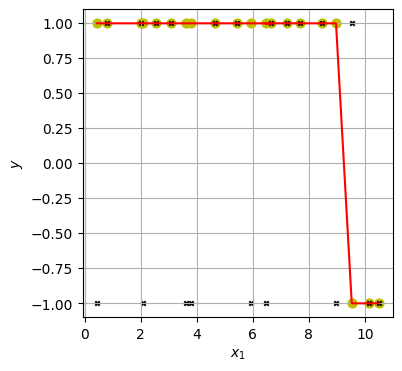

In [26]:
# Fijamos valores globales del ejemplo
N = 20
seed = 1460
np.random.seed(seed=seed)

# Nueva función "generate_XY"
def generate_XY(N):
  m = np.random.rand()
  b = np.random.randint(5)
  X = np.linspace(0,10,N) + np.random.random(N)
  Y = np.sign(np.random.normal(size=N))
  X = X.reshape(-1,1) #<- necesario para tener vectores columna
  Y = Y.reshape(-1,1) #<- necesario para tener vectores columna
  return X,Y

# Función discriminante
def discriminant(fun_out):
  return np.sign(fun_out)

#--Creamos N pares (x,y)
X, Y = generate_XY(N)

#--Utilizamos el objeto "reg" con la función discriminante
reg.fit(X,Y)
y_hat1 = discriminant( reg.predict(X) )

#--Utilizamos la fórmula con la función discriminante
w_star = matrix_solution(X,Y)
y_hat2 = discriminant( w_star[0] + np.matmul(X,w_star[1]) )

#--Pintamos
plt.plot(X, y_hat1,'r')
plt.scatter(X, y_hat2,c='y',s=40)
plt.scatter(X,Y,c='k',s=10, marker = 'x')
plt.xlabel('$x_1$'); plt.ylabel('$y$')
plt.grid()
plt.show()

En la figura vemos que la línea roja ahora es quebrada. <br>
El motivo es que se trata de una línea que une los pares $(x,\hat y)$. Si en vez de usar `plot` usáramos `scatter` tendríamos puntos rojos sobre los puntos amarillos.

Es interesante ver que el clasificador acierta en varios casos pero también falla en otros. <br> Este ejemplo era muy simple. Vamos a ver otro un poco más interesante.

### Ejemplo 2

En este ejemplo vamos a aumentar un poco la complejidad de los datos para poder ver la superficie de decisión.

Ahora cada ejemplo tendrá dos características $~(x_1,x_2)~$ y una etiqueta asociada $y \in \{+1, -1\}.$

Comenzamos generando el conjunto de datos creando una función `generateX_2D` que muestrea $N$ pares $~(x_1,x_2)~$  de una distribución normal con media $\mu$ y desviación $\sigma$ y asocia, a todos ellos, la misma etiqueta.<br>
Además se crea otra función `generate_XY` que invoca a la anterior para crear primero las etiquetas positivas y luego las negativas.<br>
Finalmente se llama a esta última para tener todo en un dataframe de Pandas.

In [27]:
# Función que genera pares (x_1, x_2) con la misma etiqueta
def generateX_2D(N, mu=0, sigma=1, label=1):
  data = np.random.normal(mu, sigma, (N, 2))
  df = pd.DataFrame(data, columns=["x1", "x2"])
  df["y"] = np.ones(N)*label
  return df

# Función que genera pares (x_1, x_2) de varias etiquetas
def generate_XY(N, mu, sigma, label):
  df0 = generateX_2D(N, mu[0], sigma[0], label[0])
  df1 = generateX_2D(N, mu[1], sigma[1], label[1])
  df = pd.concat([df0,df1], axis=0)
  df = df.sample(2*N, ignore_index=True)
  return df

#-- generación del conjunto de datos para el ejemplo
N = 20
mu = [-1,1]
sigma = [1,1]
label = [-1,1]
df = generate_XY(N,mu,sigma,label)

#-- mostramos los 5 primeros ejemplos
print(df.head(5))

       x1      x2    y
0  1.1815 -1.8454  1.0
1  0.4262  1.0612  1.0
2 -1.0933 -1.5220 -1.0
3 -1.4521 -0.7988 -1.0
4  2.7961  0.5085  1.0


Como ya hemos creado el objeto `reg` en celdas anteriores, simplemente tenemos que volver a aprenderlo con los nuevos datos de este ejemplo.

In [28]:
#-- Aprendizaje del modelo lineal

X = df[['x1','x2']]
Y = df['y']
reg.fit(X,Y)
print(f'Los parámetros aprendidos para un modelo lineal son:')
print(f' w = {reg.coef_} , w0 = {reg.intercept_:0.2f}')

Los parámetros aprendidos para un modelo lineal son:
 w = [0.37 0.25] , w0 = 0.14


Para ver la superficie de decisión utilizamos la ecuación explícita del plano de decisión.

A partir de su ecuación explícita $~w_0 + w_1x_1 + w_2x_2 = 0~$ podemos despejar $x_2$ en función de $x_1$ y obtenemos
$~ x_2 = \left(-\frac{w_0}{w_2}\right)+\left(-\frac{w_1}{w_2}\right)x_1. ~$

Dando valores a $x_1$ dentro de un intervalo y usando la última ecuación obtenemos los correspondientes $x_2$.

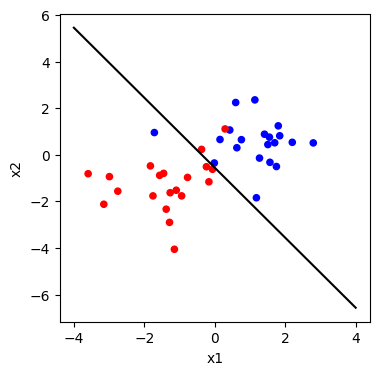

In [29]:
def decision_plane(reg, x1):
  w0 = reg.intercept_
  w = reg.coef_
  x2 = (-w0/w[1]) + (-w[0]/w[1])*x1
  return x2

x1 = np.linspace(-4,4,10)
x2 = decision_plane(reg, x1)

colors=df['y'].copy()
colors[colors==1]='b'
colors[colors==-1]='r'
df.plot.scatter(x='x1',y='x2',c=colors)
plt.plot(x1,x2,'k')
plt.show()

# Ejercicios

Con el conjunto de datos "Iris" de la biblioteca Scikit-learn, hacer lo siguiente:
1. Cargar el conjunto y hacer una exploración sencilla para averiguar:
   - cuantas clases diferentes hay
   - cuantos ejemplos tiene
   - cuantos atributos tiene
2. Separar el conjunto de datos original en un conjunto de entrenamiento del 85% para aprender un modelo lineal y el 15% restante para testearlo.
<br>
--- A partir de ahora el enunciado SIEMPRE se refiere al conjunto de entrenamiento ---
3. Transformar el conjunto de datos en otro que tenga sólo los 2 primeros componentes principales.
4. Aprender un modelo lineal para discriminar la clase 0 de las otras dos. <br>
Aprender otro modelo lineal para discriminar la clase 1 de las otras dos.<br>
Aprender un tercer modelo lineal para discriminar la clase 2 de las otras.
5. Pintar el conjunto de datos y los tres clasificadores.<br>
--- AHORA, Con el conjunto de test ---
5. Pintar con cruces los datos del conjunto de test y con circulos las predicciones que hace cada clasificador.<br>
Por ejemplo, con el clasificador de la clase 0 frente al resto, pintar solo aquellas predicciones que sean de la clase 0, para poder comparar con las verdaderas, y así con las demás.


In [28]:
import pandas as pd

# Cargar datos de iris:
from sklearn.datasets import load_iris

# Cargar el conjunto de datos:
data = load_iris()
df = pd.DataFrame(data.data, columns= data.feature_names)
df['species'] = pd.Categorical.from_codes(data.target, data.target_names)

In [29]:
print(df.species, '\n\n')
df.info()
# Hay 3 categorías diferentes, 150 ejemplos y 5 atributos

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica'] 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [30]:
# Separar test, train:
from sklearn.model_selection import train_test_split

trainSet, testSet = train_test_split(df, test_size= 0.15, random_state= 8)

In [4]:
# Codificar los datos del atributo 'species':
from sklearn.preprocessing import LabelEncoder

train = trainSet
le = LabelEncoder()
le.fit(train['species'])
train['species'] = le.transform(train['species'])

In [83]:
# Codificación OneHot:
from sklearn.preprocessing import OneHotEncoder

train = trainSet.copy()
encoder = OneHotEncoder(sparse=False)
encoder.fit(train[['species']])
encoded_species = encoder.transform(train[['species']])
train.drop('species', axis=1, inplace=True)
train_species = pd.concat([train, pd.DataFrame(encoded_species, columns=['specie_0', 'specie_1', 'specie_2'])], axis=1)

C:\Users\Diego\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [84]:
print(train_species.info(), '\n')
print(train_species.iloc[126].to_frame().T, '\n\n\n', train_species.iloc[127].to_frame().T)
# tiene valores nulos a partir de la entrada 127

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 89 to 119
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  127 non-null    float64
 1   sepal width (cm)   127 non-null    float64
 2   petal length (cm)  127 non-null    float64
 3   petal width (cm)   127 non-null    float64
 4   specie_0           127 non-null    float64
 5   specie_1           127 non-null    float64
 6   specie_2           127 non-null    float64
dtypes: float64(7)
memory usage: 8.9 KB
None 

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
84                5.4               3.0                4.5               1.5   

    specie_0  specie_1  specie_2  
84       0.0       1.0       0.0   


    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
1                NaN               NaN                NaN               NaN   

   specie_0  specie_1 

In [85]:
train_species= train_species.iloc[:127]
train_species.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127 entries, 89 to 84
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  127 non-null    float64
 1   sepal width (cm)   127 non-null    float64
 2   petal length (cm)  127 non-null    float64
 3   petal width (cm)   127 non-null    float64
 4   specie_0           111 non-null    float64
 5   specie_1           111 non-null    float64
 6   specie_2           111 non-null    float64
dtypes: float64(7)
memory usage: 7.9 KB


In [86]:
# Transforma el conjunto de datos en otro compuesto por los dos componentes principales del primero:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(train)
train_pca = pd.DataFrame(pca.transform(train))

In [87]:
pca.components_

array([[ 0.35871414, -0.086252  ,  0.85837158,  0.356487  ],
       [ 0.62668669,  0.76015598, -0.16154761, -0.05769782]])

In [82]:
train_pca.info()
train_species['species_0'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       127 non-null    float64
 1   1       127 non-null    float64
dtypes: float64(2)
memory usage: 2.1 KB
<class 'pandas.core.series.Series'>
Int64Index: 127 entries, 89 to 84
Series name: species_0
Non-Null Count  Dtype  
--------------  -----  
111 non-null    float64
dtypes: float64(1)
memory usage: 2.0 KB


In [88]:
# Entreno el modelo lineal para 
from sklearn.linear_model import LogisticRegression

X_train = train_pca
y_train = train_species['specie_0']

model_specie_0 = LogisticRegression()
model_specie_0.fit(X_train, y_train)

ValueError: Input y contains NaN.

In [40]:
# Prueba del modelo:
test = testSet.copy()
test['species'] = le.transform(test['species'])
X_test = pca.transform(test)

prediction = model.predict(X_test)

In [41]:
prediction

array([0, 0, 0, 2, 1, 0, 0, 2, 2, 1, 1, 0, 1, 1, 2, 2, 2, 2, 1, 2, 1, 0,
       1])

In [ ]:
#Ejercicio Completo
import pandas as pd

# Cargar datos de iris:
from sklearn.datasets import load_iris

# Cargar el conjunto de datos:
data = load_iris()
df = pd.DataFrame(data.data, columns= data.feature_names)
df['species'] = pd.Categorical.from_codes(data.target, data.target_names)

print(df.species, '\n\n')
df.info()
# Hay 3 categorías diferentes, 150 ejemplos y 5 atributos

# Separar test, train:
from sklearn.model_selection import train_test_split

trainSet, testSet = train_test_split(df, test_size= 0.15, random_state= 8)

# Codificar los datos del atributo 'species':
from sklearn.preprocessing import LabelEncoder

train = trainSet
le = LabelEncoder()
le.fit(train['species'])
train['species'] = le.transform(train['species'])

# Transforma el conjunto de datos en otro compuesto por los dos componentes principales del primero:
from sklearn.decomposition import PCA

pca = PCA(n_components= 2)
pca.fit(train)
train_pca = pd.DataFrame(pca.transform(train))

# Entreno el modelo lineal para 
from sklearn.linear_model import LogisticRegression

X_train = train_pca
y_train = train['species']

model = LogisticRegression()
model.fit(X_train, y_train)

# Prueba del modelo:
test = testSet.copy()
test['species'] = le.transform(test['species'])
X_test = pca.transform(test)

prediction = model.predict(X_test)